# **PCLab#1**

*This notebook contains the performance of the tasks of the first lab of the **Finance with Big Data course**. The context of the participants' activities revolves around their recent hiring by an established **Asset Management company**. Their team is entrusted with the management of a regulated mutual fund. Specifically, the fund manager has tasked them with determining the **optimal weights to construct a tangency portfolio** composed of selected securities, for which their broker does not impose any transaction fees.*

## **Task #1 :Import the data and describe the sample**

In [32]:
# Import libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from scipy.optimize import minimize
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint

from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [4]:
df_data = pd.read_csv('Data_PCLab1_Stock.csv')
df_data

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


### Sort the stock data by date and print the number of stocks.

In [6]:
# Now, sort the DataFrame by 'Date'
df_data = df_data.sort_values(by='Date')

# Optionally, reset the index after sorting (if you want a clean index)
df_data = df_data_sorted.reset_index(drop=True)

In [7]:
df_data

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


### Check if data contains any null values.

In [9]:
# Check for null values in each column
df_data.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

### What is the average market value of the S&P500 ?

In [82]:
average_value_sp500 = df_data['sp500'].mean()
print("The average S&P500 value is:", average_value_sp500)

The average S&P500 value is: 2218.7495540592868


### Which stock or index has the minimum dispersion in dollar value ?

In [11]:
# Compute variance for all columns except 'Date'
variance_values = df_data.drop(columns=['Date']).var()

# Find the column with the minimum variance
min_variance_column = variance_values.idxmin()
min_variance_value = variance_values.min()

# Print the result
print(f"Column with the lowest dispersion: {min_variance_column} (Variance: {min_variance_value})")

Column with the lowest dispersion: T (Variance: 10.287991152386866)


### What is the maximum price for Amazon stock over the specified time period?

In [12]:
# Find the row with the maximum value in the 'Amazon' column
max_amazon_value = df_data['AMZN'].max()

# Find the corresponding date for the maximum 'Amazon' value
max_amazon_date = df_data.loc[df_data['AMZN'] == max_amazon_value, 'Date'].values[0]

# Print the result
print(f"Maximum value in 'Amazon': {max_amazon_value} (Date: {max_amazon_date})")

Maximum value in 'Amazon': 3225.0 (Date: 2020-08-06)


## **Task #2 : Plot the data**

In [83]:
import matplotlib.pyplot as plt

def plot_df(df):
    # Specify the columns to plot
    columns_to_plot = df.drop(['Date'], axis=1).columns.tolist()

    # Create a figure and axis for the plot
    plt.figure(figsize=(10, 6))
    sns.set_style("darkgrid")
    
    # Plot each column against 'Date'
    for col in columns_to_plot:
        plt.plot(df['Date'], df[col], label=col)

    # Add labels and title
    plt.xlabel('Date')
    plt.xticks(np.arange(0, len(df), step=90), rotation=45)   # Set the xticks to be every 90 days
    plt.ylabel('Price $')
    plt.title('Stock Prices Over Time')
    plt.legend(loc='best')

    # Rotate the date labels for better readability
    plt.xticks(rotation=45)

    # Display the plot
    plt.tight_layout()
    plt.show()
    

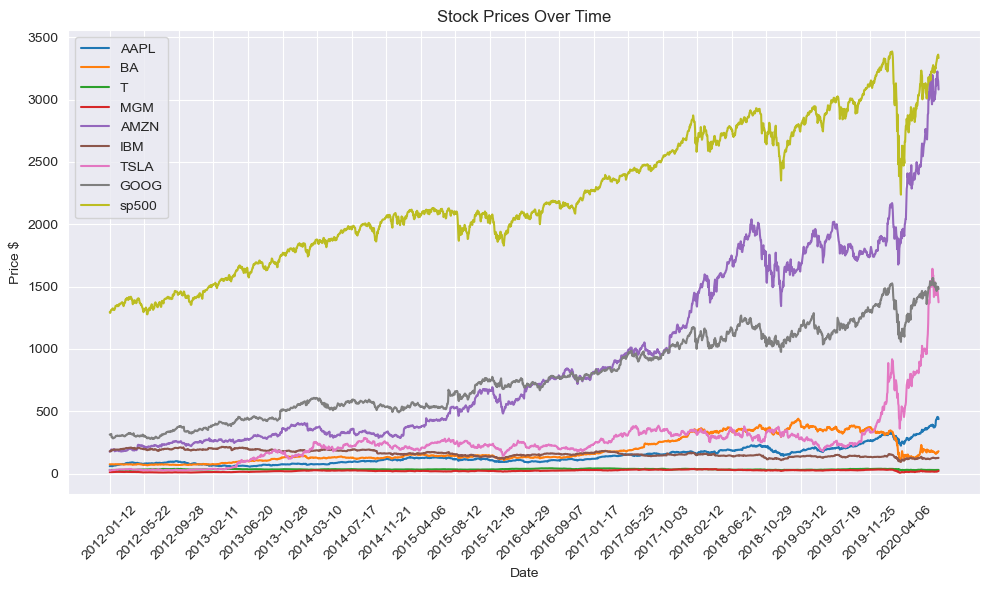

In [29]:
plot_df(df_data)

## Task #3 : Print out normalized (scaled) stock prices

In [30]:
def normalizer(df):
    return df/df.iloc[0]
    
df_norm = normalizer(df_data.drop(columns=['Date'], axis = 1))
df_norm['Date'] = df_data['Date']
#to put date at the beginning:
df_norm = df_norm[['Date', 'AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', 'sp500']]
df_norm

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2012-01-13,0.996251,0.987949,0.998340,1.018137,1.014153,0.992301,0.806726,0.992615,0.995052
2,2012-01-17,1.007855,0.996424,1.004316,1.009893,1.032570,0.996954,0.941593,0.998317,0.998587
3,2012-01-18,1.018320,0.994040,1.006972,1.049464,1.076792,1.002880,0.949027,1.005193,1.009680
4,2012-01-19,1.015093,1.000662,1.009960,1.055235,1.105269,0.999834,0.947257,1.015771,1.014666
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,7.313297,2.308039,0.991036,1.378401,18.217644,0.694821,52.567080,4.698347,2.568715
2155,2020-08-06,7.568452,2.280493,0.990704,1.521847,18.331155,0.698532,52.728494,4.782805,2.585226
2156,2020-08-07,7.383066,2.251622,0.996680,1.568838,18.004093,0.692107,51.423361,4.764919,2.586862
2157,2020-08-10,7.490377,2.375977,1.002656,1.784831,17.894390,0.704016,50.214865,4.770052,2.593956


### Plot normalized data

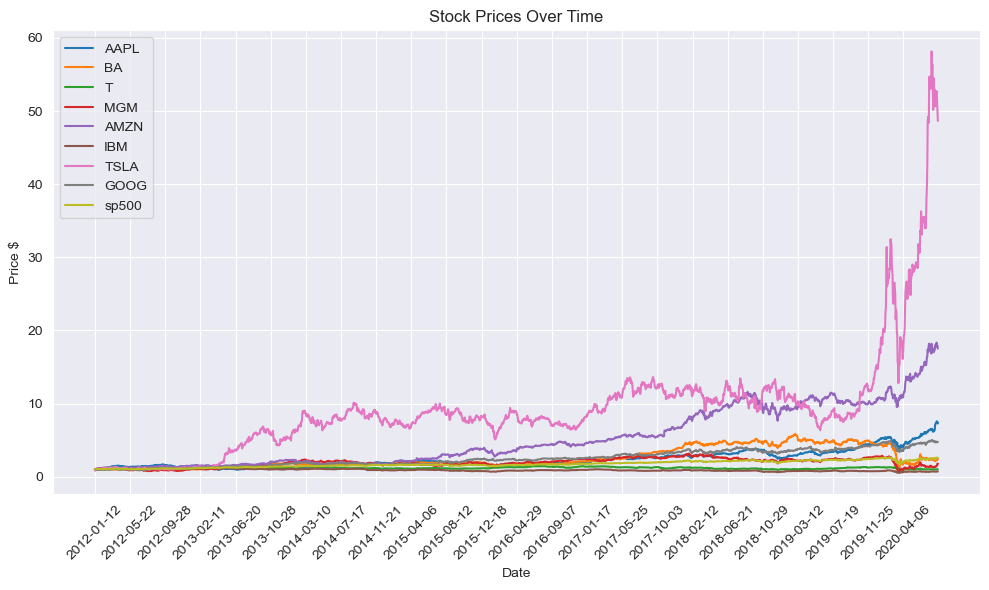

In [31]:
plot_df(df_norm)

## Task #5 : Calculate stock returns (1)

### Define a function to calculate stocks daily returns (for all stocks)

In [33]:
# Let's define a function to calculate stocks daily returns (for all stocks) 
def daily_return(df):
  df_daily_return = df.copy()

  # Loop through each stock (while ignoring time columns with index 0)
  for i in df.columns[1:]:
    
    # Loop through each row belonging to the stock
    for j in range(1, len(df)):

      # Calculate the percentage of change from the previous day
      df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
    
    # set the value of first row to zero since the previous value is not available
    df_daily_return[i][0] = 0
  
  return df_daily_return

stock_daily_return_df = daily_return(df_data)
stock_daily_return_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2012-01-13,-0.374946,-1.205144,-0.166006,1.813685,1.415339,-0.769869,-19.327430,-0.738516,-0.494792
2,2012-01-17,1.164812,0.857909,0.598603,-0.809717,1.815943,0.468852,16.717854,0.574410,0.355295
3,2012-01-18,1.038382,-0.239234,0.264463,3.918367,4.282725,0.594448,0.789470,0.688856,1.110793
4,2012-01-19,-0.316937,0.666134,0.296736,0.549882,2.644634,-0.303752,-0.186494,1.052283,0.493866
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,0.362467,5.579446,-0.533156,0.000000,2.109065,-0.309917,-0.133153,0.589774,0.642974
2155,2020-08-06,3.488923,-1.193483,-0.033501,10.406699,0.623082,0.534082,0.307062,1.797626,0.642770
2156,2020-08-07,-2.449458,-1.265966,0.603217,3.087768,-1.784187,-0.919762,-2.475194,-0.373974,0.063303
2157,2020-08-10,1.453480,5.522880,0.599604,13.767729,-0.609323,1.720552,-2.350092,0.107728,0.274222


### Plot

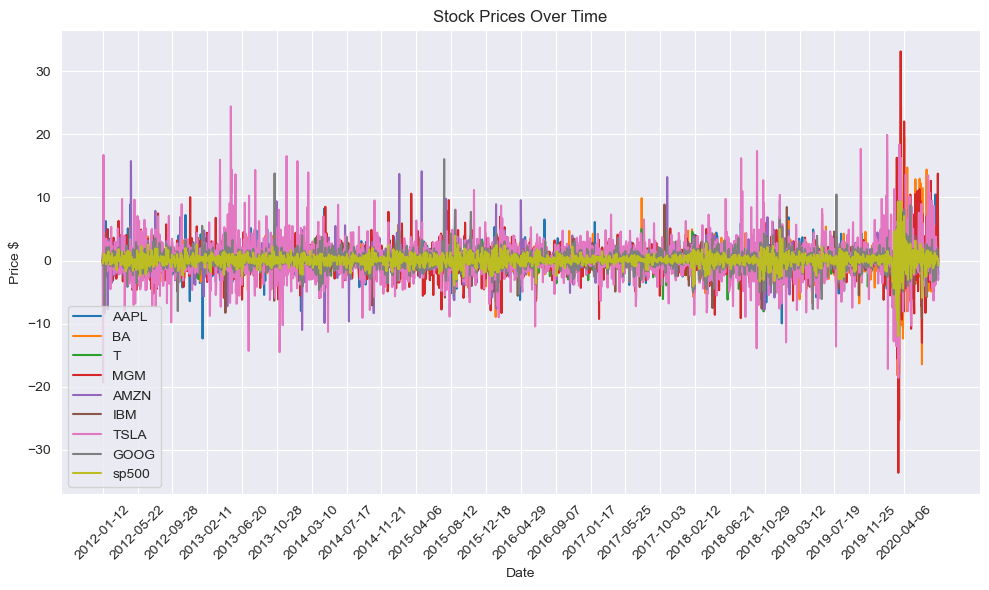

In [34]:
plot_df(stock_daily_return_df)

## Task #5 : Calculate stock returns (2)

### Calculate the correlations between daily returns

In [37]:
corr_matrix = stock_daily_return_df.corr()
corr_matrix

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
AAPL,1.000000,0.385250,0.341373,0.384089,0.410234,0.434534,0.288535,0.509125,0.657321
BA,0.385250,1.000000,0.401602,0.554229,0.267466,0.479264,0.250946,0.388048,0.641826
T,0.341373,0.401602,1.000000,0.340166,0.233145,0.484219,0.152515,0.353695,0.617463
MGM,0.384089,0.554229,0.340166,1.000000,0.309016,0.441631,0.311879,0.439142,0.631449
AMZN,0.410234,0.267466,0.233145,0.309016,1.000000,0.339589,0.310084,0.575284,0.539560
IBM,0.434534,0.479264,0.484219,0.441631,0.339589,1.000000,0.245609,0.458816,0.703935
TSLA,0.288535,0.250946,0.152515,0.311879,0.310084,0.245609,1.000000,0.322805,0.387921
GOOG,0.509125,0.388048,0.353695,0.439142,0.575284,0.458816,0.322805,1.000000,0.684572
sp500,0.657321,0.641826,0.617463,0.631449,0.539560,0.703935,0.387921,0.684572,1.000000


### Plot the correlation table as in heat-map

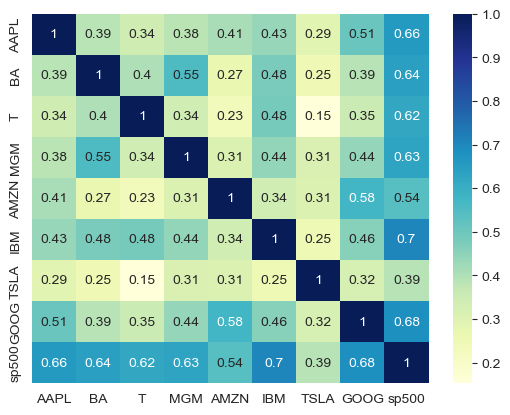

In [38]:
dataplot = sns.heatmap(stock_daily_return_df.corr(numeric_only=True), cmap="YlGnBu", annot=True)

### What are the top 2 stocks that are positively correlated with the S&P500?

In [39]:
corr_matrix['sp500'].sort_values(ascending=False)[1:3]

IBM     0.703935
GOOG    0.684572
Name: sp500, dtype: float64

### What is the correlation between Amazon and Boeing?

In [40]:
round(corr_matrix['AMZN']['BA'],3)

0.267

### What is the correlation between MGM and Boeing?

In [41]:
round(corr_matrix['MGM']['BA'],3)

0.554

## Task #5 : Calculate stock returns (3)

### Plot the histograms of daily returns

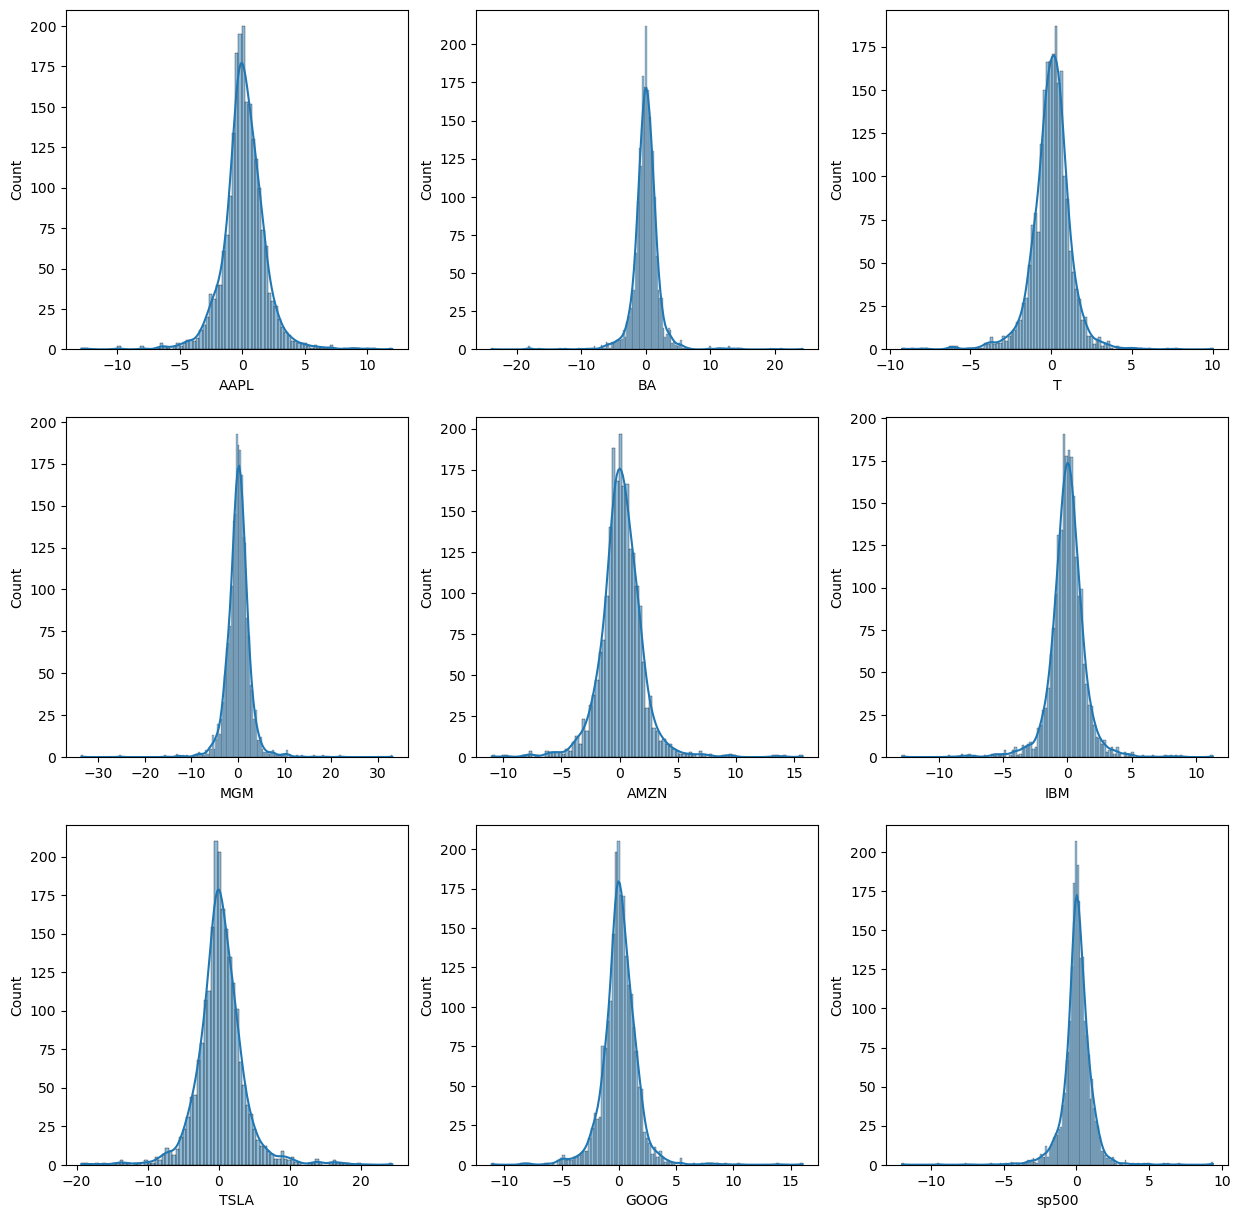

In [74]:
#plt.figure(figsize=(15, 5))
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for i in stock_daily_return_df.drop('Date', axis=1).columns:
    sb.histplot(stock_daily_return_df[i], 
                 label = i, # Set the label as the name of the stock
                 kde = True, # Plot the kernel density estimation
                 ax = ax.flatten()[stock_daily_return_df.drop('Date', axis=1).columns.get_loc(i)], # Flatten the axes and select cyclically the right one
               
                #color = palette[stock_daily_return_df.drop('Date', axis=1).columns.get_loc(i)]    # Set the color of the plot
               )
plt.show()

## Task #6 : Portfolio weights

*Write a function that will:*

*– Simulate 1000 portfolios with random weights*

*– Compute the return, the variance and the Sharpe ratio of each portfolio*

*– Return the maximum Sharpe ratio and its weights*

In [57]:
def compute_returns(df, method='log'):

    returns_df = np.log(df.drop(['Date'], axis=1)/df.drop(['Date'], axis=1).shift(1))

    return returns_df

In [84]:
returns_dff = compute_returns(df_data)
returns_dff

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.003757,-0.012125,-0.001661,0.017974,0.014054,-0.007728,-0.214772,-0.007413,-0.004960
2,0.011581,0.008542,0.005968,-0.008130,0.017997,0.004678,0.154589,0.005728,0.003547
3,0.010330,-0.002395,0.002641,0.038435,0.041936,0.005927,0.007864,0.006865,0.011047
4,-0.003174,0.006639,0.002963,0.005484,0.026103,-0.003042,-0.001867,0.010468,0.004927
...,...,...,...,...,...,...,...,...,...
2154,0.003618,0.054294,-0.005346,0.000000,0.020871,-0.003104,-0.001332,0.005880,0.006409
2155,0.034294,-0.012007,-0.000335,0.099001,0.006211,0.005327,0.003066,0.017817,0.006407
2156,-0.024800,-0.012740,0.006014,0.030411,-0.018003,-0.009240,-0.025063,-0.003747,0.000633
2157,0.014430,0.053758,0.005978,0.128989,-0.006112,0.017059,-0.023781,0.001077,0.002738


In [79]:
def portfolio_simulation(df, rf=0, n=20000):
    """
    Simulates portfolios with random weights and calculates return, variance, and Sharpe ratio for each.
    
    Parameters:
    returns (pd.DataFrame): DataFrame of daily returns for each asset.
    num_portfolios (int): Number of portfolios to simulate.
    risk_free_rate (float): Annualized risk-free rate for Sharpe ratio calculation.
    
    Returns:
    max_sharpe (float): Maximum Sharpe ratio achieved.
    max_sharpe_weights (np.ndarray): Weights of the portfolio with the maximum Sharpe ratio.
    """
    
    # Compute the returns
    returns = compute_returns(df).drop(['sp500'], axis=1) - rf/252   # The risk-free rate is annualized, so we divide it by 252
    avg_returns = returns.mean() * 252
    cov_matrix = returns.cov() * 252
    
    # Simulation
    portfolio_returns = []
    portfolio_std_devs = []
    sharpe_ratio = []
    weights_list = []
    np.random.seed(42)  # Set the seed to 42 for reproducibility

    for i in tqdm(range(n)):

        # Generating random weights using a Dirichlet distribution
        weights = np.random.dirichlet(np.ones(len(df.drop(['Date', 'sp500'], axis=1).columns)), size=1)[0]

        # # Generating random weights
        # weights = np.random.random(len(df.drop(['Date','sp500'], axis=1).columns))
        # weights /= np.sum(weights)
        
        portfolio_return = np.sum(avg_returns * weights)
        portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        sharpe = (portfolio_return)/portfolio_std_dev
        
        portfolio_returns.append(portfolio_return)
        portfolio_std_devs.append(portfolio_std_dev)
        sharpe_ratio.append(sharpe)
        weights_list.append(weights)

    # Find the index of the portfolio with the maximum Sharpe ratio
    ind = np.argmax(sharpe_ratio)
    max_sharpe_ratio = sharpe_ratio[ind]
    max_sharpe_return = portfolio_returns[ind]
    max_sharpe_std_dev = portfolio_std_devs[ind]
    max_sharpe_weights = weights_list[ind]
    
    return portfolio_returns, portfolio_std_devs, sharpe_ratio, max_sharpe_ratio, max_sharpe_return, max_sharpe_std_dev, max_sharpe_weights

In [75]:
def plot_simulation(portfolio_returns,
                  portfolio_std_dev,
                  sharpe_ratio,
                  max_sharpe_ratio,
                  max_sharpe_return,
                  max_sharpe_std_dev,
                  max_sharpe_weights):
    
    plt.figure(figsize=(15, 5))
    sns.color_palette("husl", 9)
    sns.set_style("darkgrid")

    plt.scatter(portfolio_std_dev, portfolio_returns, c=sharpe_ratio, cmap='plasma')
    plt.colorbar(label='Sharpe Ratio')
    plt.xlabel('Volatility')
    plt.ylabel('Returns')
    plt.title('Portfolio Optimization')

    plt.scatter(max_sharpe_std_dev, max_sharpe_return, c='red', s=50, edgecolors='black')
    plt.show()

    print(f'The maximum Sharpe ratio is {round(max_sharpe_ratio, 2)}')
    print(f'The return of the best portfolio is {round(max_sharpe_return, 6)}')
    print(f'The volatility of the best portfolio is {round(max_sharpe_std_dev, 6)}')
    print(f'The weights of the best portfolio are:\n{max_sharpe_weights}')

In [80]:
portfolio_returns, portfolio_std_devs, sharpe_ratio, max_sharpe_ratio, max_sharpe_return, max_sharpe_std_dev, max_sharpe_weights = portfolio_simulation(df_data)

100%|███████████████████████████████████| 20000/20000 [00:05<00:00, 3936.57it/s]


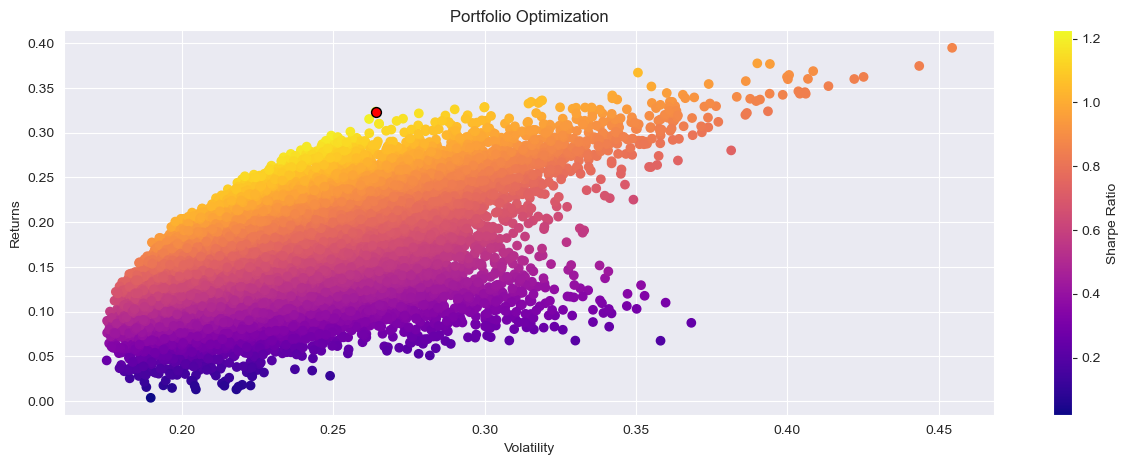

The maximum Sharpe ratio is 1.23
The return of the best portfolio is 0.323681
The volatility of the best portfolio is 0.264028
The weights of the best portfolio are:
[0.15660443 0.02652266 0.00864303 0.00811886 0.59568469 0.00910308
 0.18358305 0.0117402 ]


In [81]:
plot_simulation(portfolio_returns,
              portfolio_std_devs,
              sharpe_ratio,
              max_sharpe_ratio,
              max_sharpe_return,
              max_sharpe_std_dev,
              max_sharpe_weights)